# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [114, 261, 193]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,18044,1080,2000,2555,118,1266
1,7858,1110,1094,6818,49,287
2,180,3485,20292,959,5618,666


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Frozen: 	3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**<br>
<font color="blue">
*__Customer 1__ (Index 0), is possibly a fastfood restaurant or central kitchen with the higher than average purchase of Fresh produce which indicates that they may do a lot of cooking. __Customer 2__ (Index 1), could be a single restaurant that needs a variety of food products to produce menu items and rely more heavily on stored frozen goods like meats. __Customer 3__ (Index 2) could be a small corner grocer in any neighborhood that makes higher than average Grocery purchases because it is sold quickly.*

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Delicatessen'], axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Delicatessen'], 
                                                    test_size=0.25, random_state=23)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=23).fit(X_train, y_train)


# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)

0.027209862391961437


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**<br>
<font color="blue">
*I attempted to predict the `Delicatessen` feature based on all other features of the dataset. The prediction score is at 0.027 which indicate practically no correlation between the 5 features and the target feature, `Delicatessen`. This makes it nearly impossible to predict with any reliability the feature `Delicatessen` using this dataset and its remaining features. This means that this feature may not be necessary for identifying customers' spending habits.*

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


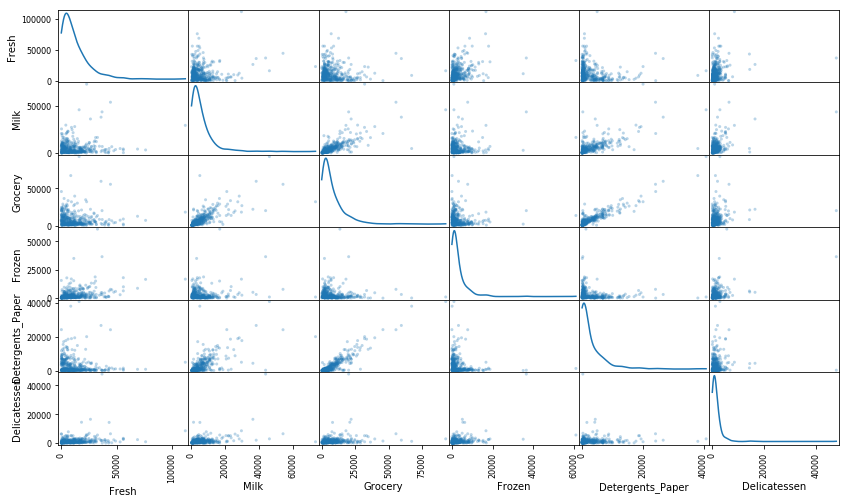

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**<br>
<font color="blue">
*All six features of the dataset appears to have right-skewed distributions and all have some outliers that extend out far to the right creating the tail of their distribution. They all have large quantities each that are close to or at 0 value. I've plotted below the distributions of all features to get a better look.*

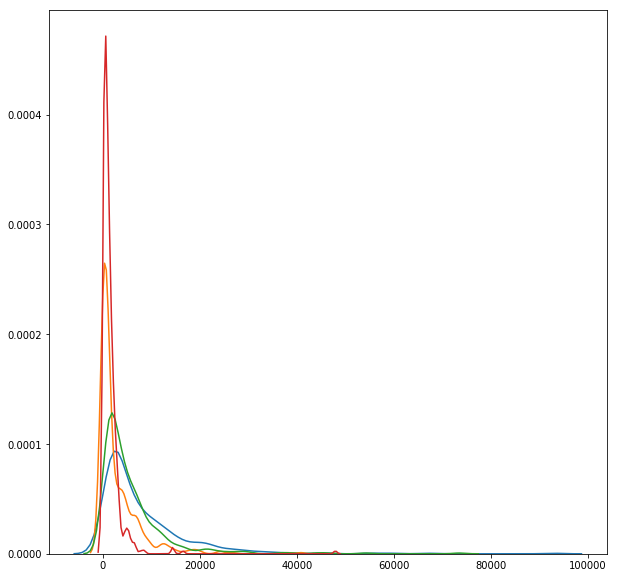

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10)) 

sns.distplot(data[['Grocery']], hist=False, ax=ax)
sns.distplot(data[['Detergents_Paper']], hist=False, ax=ax)
sns.distplot(data[['Milk']], hist=False, ax=ax)
sns.distplot(data[['Delicatessen']], hist=False, ax=ax);

<font color="blue">
    
*The scatter plots show some correlation between `Grocery`, `Milk`, and `Detergents_Paper` features. To get a better idea of how strong the correlations are, I'll visualize the correlation.*

In [7]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


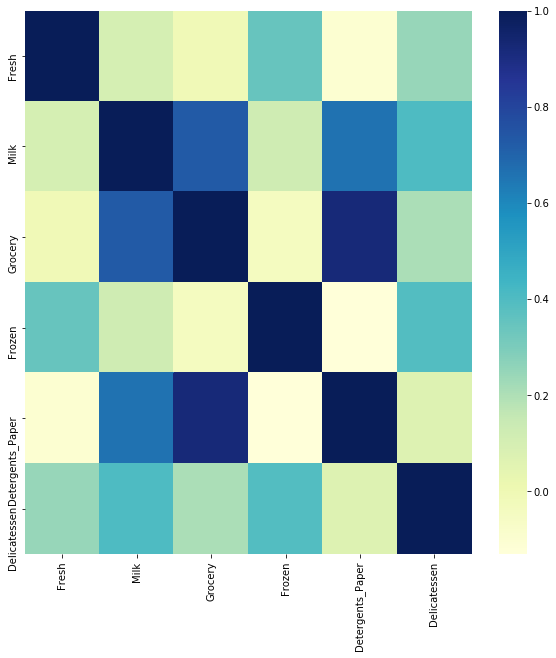

In [8]:
fig, ax = plt.subplots(figsize=(10,10)) 

sns.heatmap(data.corr(), cmap="YlGnBu", ax = ax);

<font color="blue">
    
*I did find some fairly strong correlation between the features `Grocery` and `Milk` that have an $R^2$ of 0.73 and an even stronger correlation between `Grocery` and `Detergents_Paper` with a score of 0.92. Then there is a moderate correlation between `Detergents_Paper` and `Milk` at 0.66*

*Looking at the feature `Delicatessen` that I was trying to predict, you can see that it has mostly a weak at best correlation with all other features.*

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


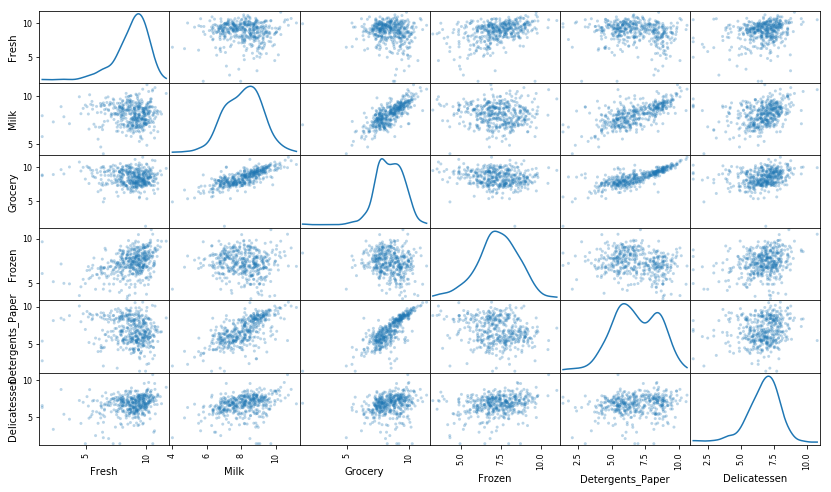

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x + 1))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x + 1))

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.800624,6.985642,7.601402,7.846199,4.779123,7.144407
1,8.969415,7.013016,6.998510,8.827468,3.912023,5.662960
2,5.198497,8.156510,9.918031,6.866933,8.633909,6.502790


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
# For each feature find the data points with extreme high or low values

outliers  = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = Q3 - Q1
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers.extend(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist())
    
# OPTIONAL: Select the indices for data points you wish to remove
# outliers  = []



Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
53,6.198479,9.256651,9.352968,6.613384,8.632662,5.416100
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
81,5.393628,9.163354,9.575261,5.648974,8.964312,5.056246
95,1.386294,7.979681,8.740817,6.089045,5.411646,6.565265
96,3.178054,7.869784,9.001962,4.983607,8.262301,5.384495
97,6.001415,5.541264,6.415097,6.652863,4.007333,4.158883
98,6.222576,4.727388,6.658011,6.797940,4.043051,4.890349
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
159,5.874931,8.949625,9.594446,5.988961,8.996900,5.717028


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
23,10.180134,10.502983,9.999706,8.547722,8.375169,9.712569
47,10.702503,10.901543,10.925435,8.959697,10.092950,8.774313
61,10.489690,10.555031,10.995394,8.087948,10.192494,7.609862
85,9.687692,10.740692,11.437997,6.934397,10.617123,7.987864
86,10.040027,11.205027,10.377078,6.895683,9.907031,6.806829
97,6.001415,5.541264,6.415097,6.652863,4.007333,4.158883
98,6.222576,4.727388,6.658011,6.797940,4.043051,4.890349
122,9.410256,5.308268,5.505332,7.596894,3.258097,6.758095
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
183,10.514557,10.690831,9.912001,10.506026,5.480639,10.777789


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
47,10.702503,10.901543,10.925435,8.959697,10.092950,8.774313
61,10.489690,10.555031,10.995394,8.087948,10.192494,7.609862
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
85,9.687692,10.740692,11.437997,6.934397,10.617123,7.987864
122,9.410256,5.308268,5.505332,7.596894,3.258097,6.758095
131,7.650645,6.380123,5.752573,5.849325,4.262680,5.739793
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
161,9.428270,6.293419,5.648974,6.996681,1.386294,7.711549
275,6.523562,7.384610,5.411646,6.760415,4.574711,5.940171
333,9.055556,8.513386,11.116901,4.882802,10.548048,7.103322


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
16,6.928538,9.084437,9.402777,4.905275,8.413831,6.985642
38,8.432071,9.663325,9.723763,3.526361,8.847504,6.073045
57,8.597482,9.203718,9.257987,3.663562,8.932345,7.156956
59,8.722254,8.586906,8.992309,4.867534,8.034307,7.380256
60,9.058470,8.021585,8.968906,4.574711,8.317766,5.420535
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
93,9.333885,8.036250,7.631917,10.463389,4.276666,7.900637
96,3.178054,7.869784,9.001962,4.983607,8.262301,5.384495
103,10.934588,8.161946,9.094593,9.799737,7.300473,7.823646
106,7.282761,8.754319,9.278466,4.897840,8.829226,7.513164


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
161,9.428270,6.293419,5.648974,6.996681,1.386294,7.711549
204,7.579168,6.793466,8.561593,7.232733,1.791759,7.192182
338,1.386294,5.811141,8.856803,9.655154,2.772589,6.311735
356,10.029547,4.905275,5.389072,8.057694,2.302585,6.308098
402,10.186408,8.466742,8.535426,5.398163,2.397895,5.831882


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
23,10.180134,10.502983,9.999706,8.547722,8.375169,9.712569
25,9.690666,8.350194,8.935377,5.308268,8.295049,4.060443
42,9.292013,8.930097,9.613269,5.241747,8.839277,3.850148
43,6.447306,9.314340,10.085767,6.669498,9.162200,4.290459
44,9.176887,8.857657,9.256460,6.295266,8.437934,4.189655
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
71,9.814219,7.144407,9.954323,8.589328,8.336630,9.580040
87,10.675122,8.522380,9.001839,8.750366,7.365180,9.571645
88,8.970178,6.297109,8.304742,9.183586,5.111988,3.850148
97,6.001415,5.541264,6.415097,6.652863,4.007333,4.158883


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**<br>
<font color="blue">
*Based on Tukey's method, there are some outliers spanning all features of the dataset. This means that there are data points that are lower than the 1st Quartile and greater than the 3rd Quartile by 1.5 times the IQR.*

*Seeing as clustering via KMeans is something we will use we may have to delete the outliers because they will affect the position of the centroid because the Sum of the Squared Errors will be too high.*
<br><br>
*However we need to check if any of the samples have selected are outliers and make sure it is not deleted.*

In [12]:
#check if sample is in outlier dataset
excluded = []
for ind in indices :
    if ind in outliers :
        excluded.append(ind)
        print('Samples index {} is an outlier. Do not remove this index.'.format(ind))
        

Samples index 193 is an outlier. Do not remove this index.


In [13]:
# remove excluded indices from outliers list
for i in excluded :
    outliers = list(filter(lambda a: a != i, sorted(outliers)))


<font color="blue">
    
*Another thing we want to avoid is deleting too many observations from our dataset. What percentage of the total dataset is made up of these outliers?*

In [14]:
# find and remove duplicate indices to get actual number of outliers
seen = {}
dupes = []

for x in outliers:
    if x not in seen:
        seen[x] = 1
    else:
        if seen[x] == 1:
            dupes.append(x)
        seen[x] += 1

unique_outliers = []
for i in sorted(seen.keys()):
    unique_outliers.append(i)

print('Number of outliers: {}'.format(len(unique_outliers)))

Number of outliers: 92


In [15]:
# find percentage of total observations are outliers
num_outliers = len(unique_outliers)
num_tot_observations = log_data.shape[0]

print('Outliers make up {:.0%} of the total dataset'.format(num_outliers/num_tot_observations))

Outliers make up 21% of the total dataset


<font color="blue">
    
*I don't think that the number of outliers is too large so I will go ahead and drop all the outliers detected. The remaining number of observations is still big enough to continue.*

In [16]:
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


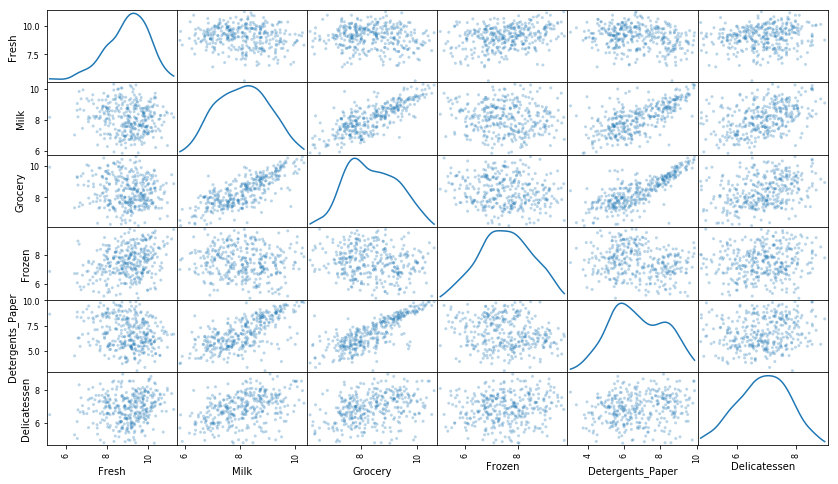

In [17]:
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [18]:
good_data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.135611,-0.105826,0.286742,-0.220693,0.141356
Milk,-0.135611,1.000000,0.774941,-0.086750,0.661791,0.414361
Grocery,-0.105826,0.774941,1.000000,-0.160279,0.793505,0.335409
Frozen,0.286742,-0.086750,-0.160279,1.000000,-0.189100,0.112431
Detergents_Paper,-0.220693,0.661791,0.793505,-0.189100,1.000000,0.171405
Delicatessen,0.141356,0.414361,0.335409,0.112431,0.171405,1.000000


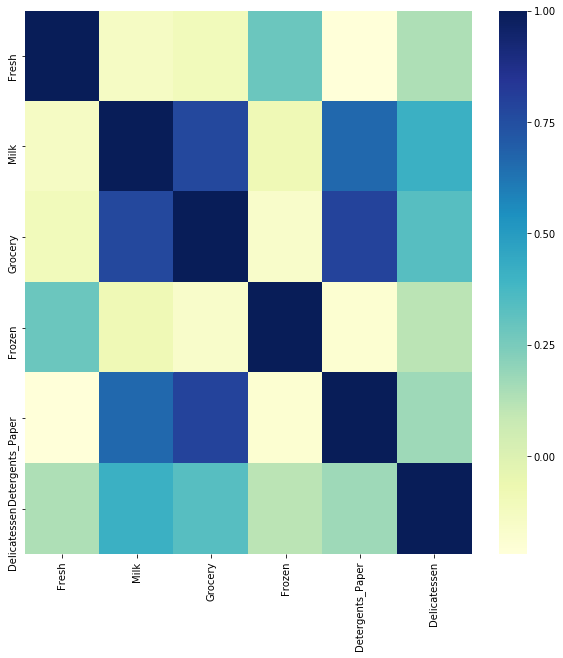

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(good_data.corr(), cmap="YlGnBu", ax = ax);

<font color="blue">
    
*After dropping the outliers, the distributions still looks more normal and long tails seen earlier are gone. Also the correlations observed between `Grocery`, `Milk`, and `Detergents_Paper`, while still having strong correlations have changed. Correlation between `Grocery` and `Detergents_Paper` is weakened but still fairly strong at 0.79. The correlation between `Grocery` and `Milk` has gotten stronger at 0.77. Correlation between `Milk`, and `Detergents_Paper` remain at 0.66.*

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

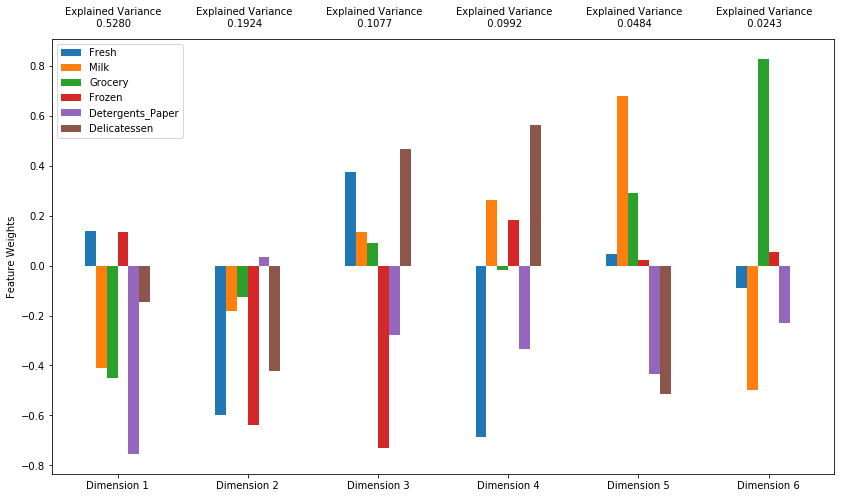

In [20]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**<br>
<font color=blue>
    *The first and second principal component explains 72% of the variation. The first four principal components explains 93%.<br><br>
    In the first principal component, the 3 most correlated features are the most represented here. These features are `Grocery`, `Milk`, and `Detergents_Paper`. They have the highest absolute weights contribution of all the 6 features and therefore the first principal component has the highest explained variance of all principal components at 53%. This indicates that as they increase `Fresh`, and `Frozen` features decrease. This is probably separates out establishments that retail these three items the most like a corner grocery store.<br><br>
    In the second principal component, the 3 most represent features are `Fresh`, `Frozen`, and `Delicatessen`. It only explains variation by about 19%. My intuition tells me that as these three features increases, we start to separate out establishments that might be in the business retailing a more varied product list than a simple grocery store like a supermarket.<br><br>
    In the third through sixth pricipal components start to have less significance due to their lower `Explained Variance` scores. On the third principal component the three most represented features are both negatively and positively weighted. `Fresh`, and `Delicatessen` are both positively weighted but the most weighted feature, `Frozen`, is negatively weighted.<br><br>
    Similarly with the fourth principal component, has its three most represents spread between negative and positive weights. `Fresh`, and `Detergents_Paper` and negatively weighted while `Delicatessen` is positively weighted. 
    Same occurs for the fifth and six principal components where on the fifth, the three most represented are `Milk` (positive), `Detergents_Paper` and `Delicatessen` (negative). On the sixth, the three most represented are `Grocery` (positive), `Milk` and `Detergents_Paper` (negative).<br><br>
    Looking at this I would gather the first two principal components tends to separate out retailers of food in their various forms like groceries and supermarkets while the final four principal components seem to be the various types of establishments that offer cooked food. These food establishments vary from restaurants, hotels, fastfoods, bakeries and central kitchens their explained variances tend to be less.*

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [21]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.4231,-0.5637,0.5070,0.0568,-0.2155,0.3124
1,3.5691,-0.0231,-1.0276,0.2791,0.7437,0.1265
2,-2.6827,2.7225,-1.5040,1.6554,-0.3279,1.1286


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [22]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [23]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.4231,-0.5637
1,3.5691,-0.0231
2,-2.6827,2.7225


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

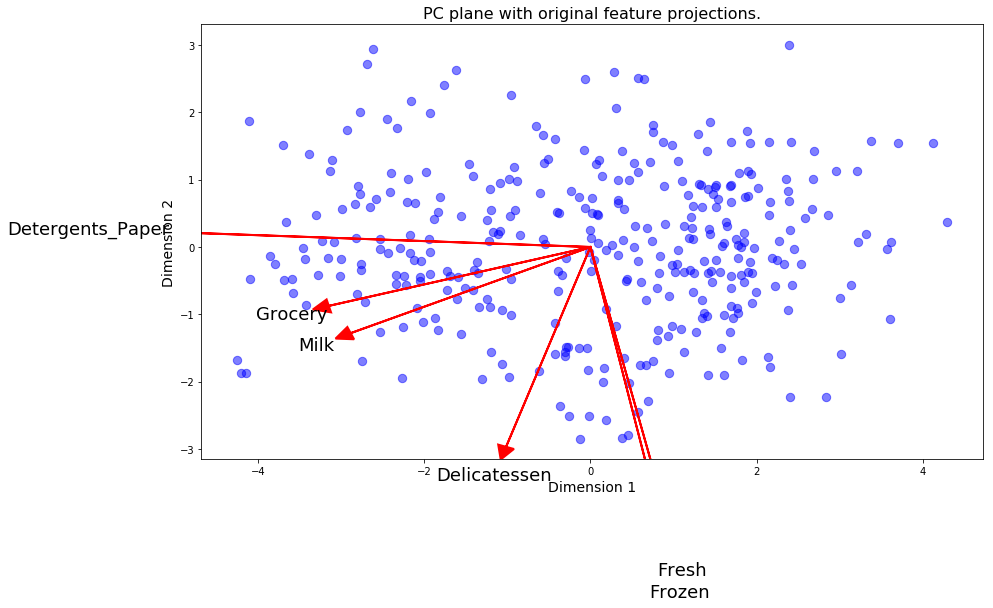

In [24]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**<br>
<font color=blue>
*K-Means "hill-climbing" algorithm and it is dependent on where you put your initial cluster centers. You are forced to run the algorthm multiple times. K-Means great for circular/spherical clusters and especially if you know the number of clusters beforehand. It is great with circular/spherical clusters because of its use of the distance from centroid in the algorithm.*

*GMM is a soft clustering algorithm which means every point in the dataset will belong to every cluster but would have different levels of membership. It is a very flexible as it can have an unconstrained covariance structure and therefore can take different shapes than just circular or spherical. For this reason, I think GMM would be the most appropriate for our dataset.*

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [25]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture

for n_components in range(2,11):
    clusterer = GaussianMixture(n_components=n_components).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    from sklearn.metrics import silhouette_score
    score = silhouette_score(reduced_data, preds)
    print('{} clusters has a silhouette score of {}'.format(n_components,score))

2 clusters has a silhouette score of 0.46715259960703054
3 clusters has a silhouette score of 0.38379123160209183
4 clusters has a silhouette score of 0.35377559531979813
5 clusters has a silhouette score of 0.33159599413852237
6 clusters has a silhouette score of 0.338015779419941
7 clusters has a silhouette score of 0.3390266509078728
8 clusters has a silhouette score of 0.3205612093161956
9 clusters has a silhouette score of 0.3028336347424744
10 clusters has a silhouette score of 0.3222821775657184


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
* 2 clusters has a silhouette score of 0.46715259960703054
* 3 clusters has a silhouette score of 0.3909409418938326
* 4 clusters has a silhouette score of 0.35377559531979813
* 5 clusters has a silhouette score of 0.3388222208864007
* 6 clusters has a silhouette score of 0.32662935439465923
* 7 clusters has a silhouette score of 0.3386203404800904
* 8 clusters has a silhouette score of 0.3123525775019633
* 9 clusters has a silhouette score of 0.3357695204515054
* 10 clusters has a silhouette score of 0.3231989816826999

<font color=blue>
    <i>2 clusters have the best silhouette score.</i>
 
    

In [26]:
clusterer = GaussianMixture(n_components=2).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

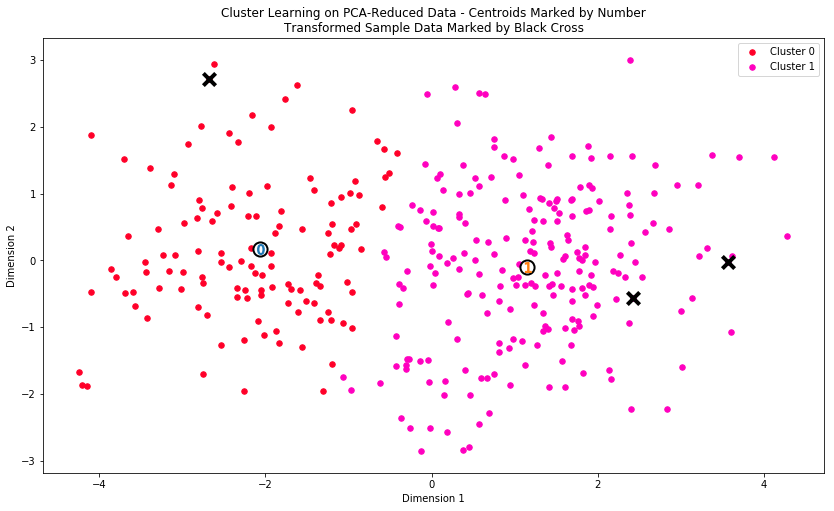

In [27]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [28]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers) - 1

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5577.0,7457.0,10747.0,1239.0,4137.0,1212.0
Segment 1,10242.0,2086.0,2622.0,2271.0,361.0,855.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**<br>
<font color=blue>
    *Segment 0 here has higher men `Milk`, `Grocery`, `Detergent_Paper` and `Delicatessen`. This makes me think that establishments that fall in this category must have a high consumption or retail rate of these products. It could easily be retailers like supermarkets but the low `Fresh` feature makes me doubt it. These are establishments that consume at a higher rate items that can easily be stored longer than `Fresh` goods. I would guess Segment 0 are establishments that do a lot of cooking like restaurants and hotels.*<br><br>
    *Segment 1 has much higher `Fresh` and `Frozen` features that could only mean retailers of foods like supermarkets.*

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [29]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**<br>
<font color=blue>
    *Previously, I had said that Sample point 0 is possibly a fastfood restaurant or central kitchen. Sample point 1, could be a restaurant. And, sample point 2 could be a small corner grocer. It looks like that my prediction then is consistent with the cluster segments that we are seeing now.*

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**<br>
<font color=blue>
    *A/B tests could be run on both segments with some customers in Segment 0 having given the change of deliveries 3 days a week while some customers with no change at all. Similarly, customers in Segment 1 will have the same treatment. This will help the wholesaler determine which customer segments will have a positive (or negative) reaction to the change and if that change is significantly different from no changes in the delivery. This significance can be determined between customers within the same customer segment and between customer segments.*

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**<br>
<font color=blue>
    *The wholesaler could employ a supervised learner by like Support Vector Machines that can train on the dataset after we've clustered the data into the two customer segments and adding it as a label in our current dataset. Then we separate this label as a target feature for the the SVM model to train on. From here, we can predict using the trained model what customer segment the new customers are likely a part of.*

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

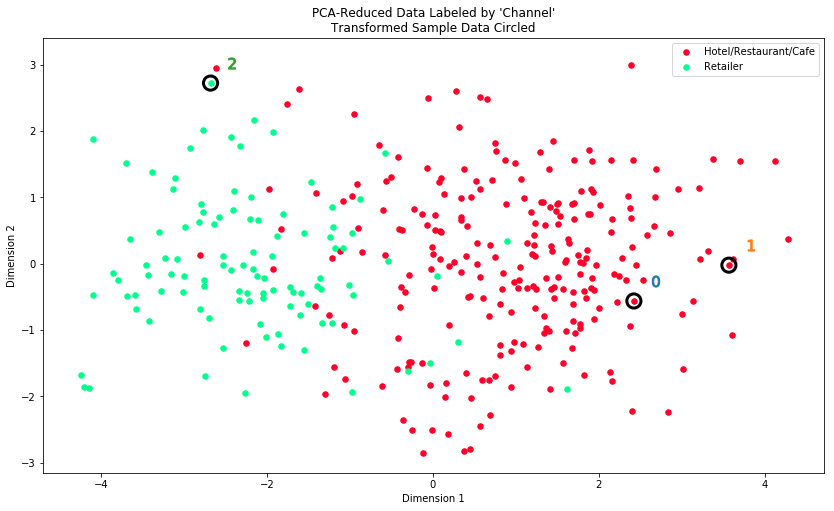

In [30]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**<br>
<font color=blue>
    *GMM appeared to have gotten quite close to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers. It has a some misclassifications but generally the shape of the clusters are close. This distribution also shows a bit of overlap between the clusters but I think there segments here that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' if you go towards the left (retailers) and as you go towards the right (hotels/restaurants etc). These classifications appear consistent with our previous definitions of the customer segments and you can see the samples I selected appear to have been classified correcly. The sample points I predicted to be a restaurant appears close to the far right while the one I predicted to be a retailer closer to the far left.*

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.